evaluating mode choice for SBB

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [2]:
# read text files 

df_benchmark = pd.read_csv("Benchmark_run-id.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)
df_zero = pd.read_csv("run-id_Zero.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)
df_current = pd.read_csv("run-id_current.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)
df_reactive = pd.read_csv("run-id_reactive.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)
df_equilibrium = pd.read_csv("run-id.EWD.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)
#df_lineTen_ca = pd.read_csv("bInputPA_SBB_project_lineTen_ca05.28.ScorePerActivityPerLegDetailed.csv", sep=";", error_bad_lines=False, index_col =None)
df_line11 = pd.read_csv("run-id_line11_after4.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)

df_IncCap_20 = pd.read_csv("run-id_incCap_20_WD_.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)
df_IncCap_20_equi = pd.read_csv("run-id_20_equi.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)

#df_EOD_20 = pd.read_csv("bInputPA_EOD_20%_equi08.17.ScorePerActivityPerLegDetailed.csv", sep=";", error_bad_lines=False, index_col =None)
#df_EOD_100 = pd.read_csv("bInputPA_EOD_100%_equi08.17.ScorePerActivityPerLegDetailed.csv", sep=";", error_bad_lines=False, index_col =None)

df_IncCap = pd.read_csv("run-id_incCap_100_WD_.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)
df_IncCap_100_equi = pd.read_csv("run-id.trip_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)

#line11_after4
#df_IncCap_wD_100_equi = pd.read_csv("bInputPA_SBB_project_line11_after406.10.ScorePerActivityPerLegDetailed.csv", sep=";", error_bad_lines=False, index_col =None)
#line11_after4 = pd.read_csv("line11_after4.person_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)



#line11
#df_IncCap_WD_20_equi = pd.read_csv("bInputPA_SBB_project_line11_WD_06.10.ScorePerActivityPerLegDetailed.csv", sep=";", error_bad_lines=False, index_col =None)



In [3]:
df_benchmark.head()

,person Id,trip no.,mode,stuck and abort trip (yes/no),departure time (trip) [sec],enter vehicle time (trip) [sec],leave vehicle time (trip) [sec],arrival time (trip) [sec],travel time (trip) [sec],in-vehicle time (trip) [sec],waiting time (for taxi/pt) (trip) [sec],travel distance (trip) [m],toll payments (trip) [monetary units],congestion toll payments (trip) [monetary units],noise toll payments (trip) [monetary units],air pollution toll payments (trip) [monetary units],approximate caused noise cost (trip) [monetary units]
0,pt_NFB_PAG_102249_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,pt_NFB_VBL_114772_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
2,pt_CNL_SBB_00784_CNL,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
3,pt_TX_BOS_13577_TX,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
4,pt_NFB_VBZ_139993_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown


In [4]:
print (" this dataframe has a size of {}".format(len(df_benchmark)))
df_benchmark.head()

 this dataframe has a size of 94163


,person Id,trip no.,mode,stuck and abort trip (yes/no),departure time (trip) [sec],enter vehicle time (trip) [sec],leave vehicle time (trip) [sec],arrival time (trip) [sec],travel time (trip) [sec],in-vehicle time (trip) [sec],waiting time (for taxi/pt) (trip) [sec],travel distance (trip) [m],toll payments (trip) [monetary units],congestion toll payments (trip) [monetary units],noise toll payments (trip) [monetary units],air pollution toll payments (trip) [monetary units],approximate caused noise cost (trip) [monetary units]
0,pt_NFB_PAG_102249_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,pt_NFB_VBL_114772_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
2,pt_CNL_SBB_00784_CNL,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
3,pt_TX_BOS_13577_TX,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
4,pt_NFB_VBZ_139993_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown


In [5]:
df_benchmark["person Id"].astype(str)
df_benchmark.drop(df_benchmark[~df_benchmark["person Id"].str.isdigit()].index, inplace=True)
df_benchmark.reset_index(drop=True, inplace=True)
df_benchmark.head()

,person Id,trip no.,mode,stuck and abort trip (yes/no),departure time (trip) [sec],enter vehicle time (trip) [sec],leave vehicle time (trip) [sec],arrival time (trip) [sec],travel time (trip) [sec],in-vehicle time (trip) [sec],waiting time (for taxi/pt) (trip) [sec],travel distance (trip) [m],toll payments (trip) [monetary units],congestion toll payments (trip) [monetary units],noise toll payments (trip) [monetary units],air pollution toll payments (trip) [monetary units],approximate caused noise cost (trip) [monetary units]
0,1162862200,1,transit_walk,no,33197.0,unknown,unknown,33481.0,284.0,unknown,unknown,0.0,0.0,unknown,unknown,unknown,unknown
1,1162862200,2,transit_walk,no,34397.0,unknown,unknown,34681.0,284.0,unknown,unknown,0.0,0.0,unknown,unknown,unknown,unknown
2,1162862200,3,pt,no,58397.0,58571.0,unknown,58667.0,270.0,unknown,174.0,0.0,0.0,unknown,unknown,unknown,unknown
3,1162862200,4,transit_walk,no,63797.0,unknown,unknown,64143.0,346.0,unknown,unknown,0.0,0.0,unknown,unknown,unknown,unknown
4,823636900,1,walk,no,43220.0,unknown,unknown,43675.0,455.0,unknown,unknown,0.0,0.0,unknown,unknown,unknown,unknown


In [6]:
df_zero.head()

,person Id,trip no.,mode,stuck and abort trip (yes/no),departure time (trip) [sec],enter vehicle time (trip) [sec],leave vehicle time (trip) [sec],arrival time (trip) [sec],travel time (trip) [sec],in-vehicle time (trip) [sec],waiting time (for taxi/pt) (trip) [sec],travel distance (trip) [m],toll payments (trip) [monetary units],congestion toll payments (trip) [monetary units],noise toll payments (trip) [monetary units],air pollution toll payments (trip) [monetary units],approximate caused noise cost (trip) [monetary units]
0,pt_NFB_PAG_102249_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,pt_NFB_VBL_114772_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
2,pt_CNL_SBB_00784_CNL,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
3,pt_TX_BOS_13577_TX,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
4,pt_NFB_VBZ_139993_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown


In [7]:
df_current.head()

,person Id,trip no.,mode,stuck and abort trip (yes/no),departure time (trip) [sec],enter vehicle time (trip) [sec],leave vehicle time (trip) [sec],arrival time (trip) [sec],travel time (trip) [sec],in-vehicle time (trip) [sec],waiting time (for taxi/pt) (trip) [sec],travel distance (trip) [m],toll payments (trip) [monetary units],congestion toll payments (trip) [monetary units],noise toll payments (trip) [monetary units],air pollution toll payments (trip) [monetary units],approximate caused noise cost (trip) [monetary units]
0,pt_NFB_PAG_102249_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,pt_NFB_VBL_114772_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
2,pt_CNL_SBB_00784_CNL,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
3,pt_TX_BOS_13577_TX,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
4,pt_NFB_VBZ_139993_NFB,1,car,no,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown


In [8]:
#df_lineTen_ca,
for scenario in [df_zero,df_current,df_reactive,df_equilibrium,
                 df_line11,df_IncCap_20,df_IncCap_20_equi,df_IncCap,df_IncCap_100_equi]:
        scenario["person Id"].astype(str)
        scenario.drop(scenario[~scenario["person Id"].str.isdigit()].index, inplace=True)
        scenario.reset_index(drop=True, inplace = True)


In [9]:
df_benchmark= df_benchmark[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_zero= df_zero[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_current= df_current[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_reactive= df_reactive[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_equilibrium= df_equilibrium[["person Id","trip no.","mode","travel time (trip) [sec]"]]
#df_lineTen_ca= df_lineTen_ca[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_line11= df_line11[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_IncCap_20= df_IncCap_20[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_IncCap_20_equi= df_IncCap_20_equi[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_IncCap= df_IncCap[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_IncCap_100_equi= df_IncCap_100_equi[["person Id","trip no.","mode","travel time (trip) [sec]"]]

In [10]:
len(df_benchmark["person Id"].unique())

12072

In [11]:
len(df_current["person Id"].unique())

12072

In [12]:
len(df_IncCap_20_equi["person Id"].unique())

12072

In [13]:
len(df_reactive["person Id"].unique())

12072

In [14]:
df_benchmark.head(3)

,person Id,trip no.,mode,travel time (trip) [sec]
0,1162862200,1,transit_walk,284.0
1,1162862200,2,transit_walk,284.0
2,1162862200,3,pt,270.0


# I filter here the agents ID

desired_person_ID = [1482897301,948954700,901209600,1022714900,1216100300,1510135400,1175800400,1152517500,1451638900,1213375200,
           1039022800,1146020000,1591322200,1584148800,1537550100,1273867100,1132438600,1595961800,1403941200,1234287800,
           1191567800,1521173100,1121550100,1047316900,1489785800,1598832900,1522548300,1474441500,1399254101,1296819000,
           1281528900,1389214900,927621500,1058147600,929416100,1498760000,1570257500,1501025500,1201853400,1076421600,
           815142300,1352284901,1208917200,814495600,1559639801,1138634100,1588174000,1196636900,1467951500,759555800,
           930177900,989300600,1532428300,1073018300,1485293900,1176712200,1101684001,1219642100,1468981100,1113676500,
           1591377500,833785000,1350253300,1134000300,914868100,1353032800,976144100,914693600,1208313400,1328334900,
           943928200,1590914601,1298388501,1416631400,1414496400,1345737400,810407400,849754800,883827200,758937400,
           988401500,898268000,928816901,1305429200,1127107600,1571127000,864576000,1169367600,1305771200,1263853700,
           926967800,1245610700,1323639800,1005064200,1370866400,1097279200,1541612200,1051477600,809814400,770157700,
           982315801,1225850100,1608915100,1178564500,1041356000,774337100,1256096300,1532847200,1369310600,1416639700,
           1221447100,1004340800,1434580000,1064200700,887310400,779094401,1344110200,793661700,811568800,1191347800,
           1024541200,868252900,1548016200,940966801,1351668001,960050700,878731400,1190168300,1113281800,1035353000,
           924984200,1191058800,1570052900,1518397400,1353032800,1113281800,1024541200,914693600,1076421600,758937400,
           1541612200,982315801,940966801,1559639801]
desired_person_ID = list(map(str, desired_person_ID))

In [15]:
desired_person_ID = [1482897301,948954700,901209600,1536782300,1022714900,1216100300,1510135400,1175800400,1152517500,1213375200,1039022800,1146020000,778510500,1248790800,
        1591322200,856290500,1584148800,1537550100,1273867100,1132438600,1595961800,1403941200,1234287800,1191567800,1521173100,881162800,1121550100,1047316900,
        1489785800,1598832900,1522548300,1474441500,1399254101,1281528900,1389214900,948012300,1058147600,1287943900,1498760000,1580232400,1570257500,1501025500,
        1201853400,1076421600,815142300,1352284901,1208917200,814495600,1559639801,1138634100,1588174000,858915900,1196636900,1467951500,797580500,759555800,
        1422887000,930177900,989300600,1532428300,1485293900,1176712200,1101684001,1219642100,1468981100,1113676500,1591377500,833785000,1350253300,1134000300,
        914868100,1353032800,914693600,1208313400,1328334900,943928200,1590914601,1298388501,1416631400,1414496400,810407400,849754800,883827200,758937400,
        1443550601,988401500,898268000,1456171500,928816901,1305429200,1127107600,1571127000,864576000,1169367600,1305771200,1263853700,926967800,1323639800,
        1005064200,1370866400,1097279200,1541612200,1051477600,770157700,982315801,1608915100,1276111100,1178564500,1041356000,774337100,1256096300,1532847200,
        1369310600,1095586400,1416639700,1221447100,1004340800,1434580000,1064200700,887310400,779094401,817551300,1344110200,1288553500,793661700,811568800,
        1191347800,1024541200,868252900,1548016200,940966801,1351668001,960050700,878731400,1103878500,1190168300,924984200,1191058800,1570052900,1518397400]
desired_person_ID = list(map(str, desired_person_ID))

desired_person_ID = [758937400,1288553500,940966801, 1482897301,948954700,901209600,1022714900,1216100300,1510135400,
                     1175800400,1152517500,1451638900,1213375200,1039022800,1146020000,1591322200,1584148800,1537550100,
                     1273867100,1132438600,1595961800,1403941200,1234287800,1191567800,1521173100,1121550100,1047316900,
                     1489785800,1598832900,1522548300,1474441500,1399254101,1296819000,1281528900,1389214900,927621500,
                     1058147600,929416100,1498760000,1570257500,1501025500,1201853400,1076421600,815142300,1352284901,
                     1208917200,814495600,1559639801,1138634100,1588174000,1196636900,1467951500,759555800,930177900,
                     989300600,1532428300,1073018300,1485293900,1176712200,1101684001,1219642100,1468981100,1113676500,
                     1591377500,833785000,1350253300,1134000300,914868100,1353032800,976144100,914693600,1208313400,
                     1328334900,943928200,1590914601,1298388501,1416631400,1414496400,1345737400,810407400,849754800,
                     883827200,758937400,988401500,898268000,928816901,1305429200,1127107600,1571127000,864576000,
                     1169367600,1305771200,1263853700,926967800,1245610700,1323639800,1005064200,1370866400,1097279200,
                     1541612200,1051477600,809814400,770157700,982315801,1225850100,1608915100,1178564500,1041356000,
                     774337100,1256096300,1532847200,1369310600,1416639700,1221447100,1004340800,1434580000,1064200700,
                     887310400,779094401,1344110200,793661700,811568800,1191347800,1024541200,868252900,1548016200,
                     940966801,1351668001,960050700,878731400,1190168300,1113281800,1035353000,924984200,1191058800,
                     1570052900,1518397400,]
desired_person_ID = list(map(str, desired_person_ID))

In [16]:
len(desired_person_ID)

140

In [17]:
len(set(desired_person_ID))

140

In [18]:
#df_benchmark = df_benchmark[df_benchmark["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_benchmark = df_benchmark.add_suffix("_EOD").rename(columns={"person Id_EOD": "personId"})
df_benchmark.head()

,personId,trip no._EOD,mode_EOD,travel time (trip) [sec]_EOD
0,1162862200,1,transit_walk,284.0
1,1162862200,2,transit_walk,284.0
2,1162862200,3,pt,270.0
3,1162862200,4,transit_walk,346.0
4,823636900,1,walk,455.0


In [19]:
df_benchmark[df_benchmark["personId"]=="1101684001"]

,personId,trip no._EOD,mode_EOD,travel time (trip) [sec]_EOD
18390,1101684001,1,pt,1572.0
18391,1101684001,2,pt,2715.0
18392,1101684001,3,pt,4805.0
18393,1101684001,4,transit_walk,1212.0


df_EOD_20 = df_EOD_20.add_suffix("_EOD_20%incCap").rename(columns={"person Id_EOD_20%incCap": "personId"})
df_EOD_20.head()

df_EOD_100 = df_EOD_100.add_suffix("_EOD_100%incCap").rename(columns={"personId_EOD_100%incCap": "personId"})
df_EOD_100.head()

In [20]:
#df_reactive = df_reactive[df_reactive["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_reactive = df_reactive.add_suffix("_start of disruption").rename(columns={"person Id_start of disruption": "personId"})
df_reactive.head()

,personId,trip no._start of disruption,mode_start of disruption,travel time (trip) [sec]_start of disruption
0,1162862200,1,transit_walk,284.0
1,1162862200,2,transit_walk,284.0
2,1162862200,3,pt,270.0
3,1162862200,4,transit_walk,346.0
4,823636900,1,walk,455.0


In [21]:
df_benchmark[df_benchmark["personId"] == "1221447100"]

,personId,trip no._EOD,mode_EOD,travel time (trip) [sec]_EOD
12737,1221447100,1,transit_walk,0.0
12738,1221447100,2,pt,2121.0
12739,1221447100,3,pt,2006.0


#df_lineTen_ca = df_lineTen_ca[df_lineTen_ca["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_lineTen_ca = df_lineTen_ca.add_suffix("_lineTen_ca").rename(columns={"person Id_lineTen_ca": "personId"})
df_lineTen_ca.head()

#df_lineTen_Schedule = df_lineTen_Schedule[df_lineTen_Schedule["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_lineTen_Schedule = df_lineTen_Schedule.add_suffix("_lineTen_Schedule").rename(columns={"person Id_lineTen_Schedule": "personId"})
df_lineTen_Schedule.head()

In [22]:
#df_IncCap = df_IncCap[df_IncCap["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_IncCap = df_IncCap.add_suffix("_IncCap").rename(columns={"person Id_IncCap": "personId"})
df_IncCap.head()

,personId,trip no._IncCap,mode_IncCap,travel time (trip) [sec]_IncCap
0,1162862200,1,walk,284.0
1,1162862200,2,walk,284.0
2,1162862200,3,pt,270.0
3,1162862200,4,transit_walk,346.0
4,823636900,1,walk,455.0


In [23]:
#df_IncCap_100_equi = df_IncCap_100_equi[df_IncCap_100_equi["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_IncCap_100_equi = df_IncCap_100_equi.add_suffix("_IncCap_100_equi").rename(columns={"person Id_IncCap_100_equi": "personId"})
df_IncCap_100_equi.head()

,personId,trip no._IncCap_100_equi,mode_IncCap_100_equi,travel time (trip) [sec]_IncCap_100_equi
0,1162862200,1,bike,135.0
1,1162862200,2,bike,135.0
2,1162862200,3,pt,270.0
3,1162862200,4,transit_walk,346.0
4,823636900,1,walk,455.0


#df_line11_after4 = df_line11_after4[df_line11_after4["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_line11_after4 = df_line11_after4.add_suffix("_line11_after4").rename(columns={"person Id_line11_after4": "personId"})
df_line11_after4.head()

In [24]:
#df_line11_after4 = df_line11_after4[df_line11_after4["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_line11= df_line11.add_suffix("_line11").rename(columns={"person Id_line11": "personId"})
df_line11.head()

,personId,trip no._line11,mode_line11,travel time (trip) [sec]_line11
0,1162862200,1,walk,284.0
1,1162862200,2,walk,284.0
2,1162862200,3,pt,270.0
3,1162862200,4,transit_walk,346.0
4,823636900,1,walk,455.0


In [25]:
#df_equilibrium = df_equilibrium[df_equilibrium["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_equilibrium = df_equilibrium.add_suffix("_EWD").rename(columns={"person Id_EWD": "personId"})
df_equilibrium.head()

,personId,trip no._EWD,mode_EWD,travel time (trip) [sec]_EWD
0,1162862200,1,transit_walk,284.0
1,1162862200,2,transit_walk,284.0
2,1162862200,3,pt,270.0
3,1162862200,4,transit_walk,346.0
4,823636900,1,walk,455.0


In [26]:
#df_current = df_current[df_current["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_current = df_current.add_suffix("_start of trip").rename(columns={"person Id_start of trip": "personId"})
df_current.head()

,personId,trip no._start of trip,mode_start of trip,travel time (trip) [sec]_start of trip
0,1162862200,1,transit_walk,284.0
1,1162862200,2,transit_walk,284.0
2,1162862200,3,pt,270.0
3,1162862200,4,transit_walk,346.0
4,823636900,1,walk,455.0


In [27]:
#df_zero = df_zero[df_zero["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_zero = df_zero.add_suffix("_no information").rename(columns={"person Id_no information": "personId"})
df_zero.head()

,personId,trip no._no information,mode_no information,travel time (trip) [sec]_no information
0,1162862200,1,transit_walk,284.0
1,1162862200,2,transit_walk,284.0
2,1162862200,3,pt,270.0
3,1162862200,4,transit_walk,346.0
4,823636900,1,walk,455.0


In [28]:
#df_IncCap_20 = df_IncCap_20[df_IncCap_20["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_IncCap_20 = df_IncCap_20.add_suffix("_IncCap_20").rename(columns={"person Id_IncCap_20": "personId"})
df_IncCap_20.head()

,personId,trip no._IncCap_20,mode_IncCap_20,travel time (trip) [sec]_IncCap_20
0,1162862200,1,walk,284.0
1,1162862200,2,walk,284.0
2,1162862200,3,pt,270.0
3,1162862200,4,transit_walk,346.0
4,823636900,1,walk,455.0


In [29]:
#df_IncCap_20_equi = df_IncCap_20_equi[df_IncCap_20_equi["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_IncCap_20_equi = df_IncCap_20_equi.add_suffix("_IncCap_20_equi").rename(columns={"person Id_IncCap_20_equi": "personId"})
df_IncCap_20_equi.head()

,personId,trip no._IncCap_20_equi,mode_IncCap_20_equi,travel time (trip) [sec]_IncCap_20_equi
0,1162862200,1,transit_walk,284.0
1,1162862200,2,transit_walk,284.0
2,1162862200,3,pt,270.0
3,1162862200,4,transit_walk,346.0
4,823636900,1,walk,455.0


In [30]:
df_benchmark[df_benchmark["personId"] == "1350253300"]

,personId,trip no._EOD,mode_EOD,travel time (trip) [sec]_EOD
31935,1350253300,1,pt,2801.0
31936,1350253300,2,pt,1581.0
31937,1350253300,3,transit_walk,2024.0
31938,1350253300,4,transit_walk,1574.0
31939,1350253300,5,transit_walk,514.0
31940,1350253300,6,walk,1036.0
31941,1350253300,7,pt,1325.0
31942,1350253300,8,pt,1917.0


In [31]:
df_reactive[df_reactive["personId"] == "1350253300"]

,personId,trip no._start of disruption,mode_start of disruption,travel time (trip) [sec]_start of disruption
31932,1350253300,1,pt,2801.0
31933,1350253300,2,pt,1581.0
31934,1350253300,3,transit_walk,2024.0
31935,1350253300,4,transit_walk,1574.0
31936,1350253300,5,transit_walk,514.0
31937,1350253300,6,walk,1036.0
31938,1350253300,7,pt,1209.0
31939,1350253300,8,pt,1918.0


In [32]:
#df_benchmark.to_excel("modeShare_df_benchmark.xlsx")
#df_reactive.to_excel("modeShare_df_reactive.xlsx")

# Evaluation for train and non-train 

In [33]:
mylist_bus = ["BRE","VBZ","AAG","BOS","Ext","PAG","RBL","REG","RVB","SBF","SBW","VBG","VBL","VZO","WTZ","ZVB","ARA",
              "BBA","BLW","BOG"]
#mylist_rail = ["BDW","FB","RB","SOB","SZU","THU","WSB","AB"]
#mylist_funicular = ["DBZ","ZBB", "VBZ_line23", "PBZ_line24"]
#mylist_ferry = ["FHM","SGG","ZSG"]
other = ["VBZ_line23"]
mylist_other = ["DBZ","ZBB", "PBZ_line24","FHM","SGG","ZSG"]
#mylist_train = ["SBB"]
mylist_train = ["SBB","BDW","FB","RB","SOB","SZU","THU","WSB","AB"]
mylist_tram = ["VBZ_line9", "VBZ_line8", "VBZ_line7", "VBZ_line6", "VBZ_line5","VBZ_line4", "VBZ_line3","VBZ_line2", 
               "VBZ_line17","VBZ_line15", "VBZ_line14", "VBZ_line13","VBZ_line12", "VBZ_line11", "VBZ_line10"]

modeshare_allagent_WD= pd.DataFrame()
#scenarios = [df_benchmark,df_equilibrium,df_reactive,df_lineTen_ca,df_lineTen_Schedule,df_IncCap,df_IncCap_100_equi,
   #             df_IncCap_20,df_IncCap_20_equi,df_line11_after4,df_current,df_zero]
             
#keys = ["EOD",'EWD','start of disruption','lineTen_ca','lineTen_Schedule','IncCap','IncCap_100_equi',
          #     'IncCap_20','IncCap_20_equi','line11','start of trip','no information']

#scenarios = [df_benchmark,df_EOD_20,df_EOD_100,df_equilibrium,df_IncCap_20_equi, df_IncCap_100_equi]

#keys = ["EOD",'EOD_20%incCap','EOD_100%incCap','EWD','IncCap_20_equi','IncCap_100_equi']

scenarios = [df_benchmark,df_zero,df_reactive,df_equilibrium,df_line11,
             df_IncCap_20,df_IncCap_20_equi,df_IncCap,df_IncCap_100_equi]
             
keys = ["EOD",'no information','start of disruption','EWD','line11',
        #'lineTen_ca',
        'IncCap_20','IncCap_20_equi','IncCap','IncCap_100_equi']


In [34]:
df_benchmark.head()

,personId,trip no._EOD,mode_EOD,travel time (trip) [sec]_EOD
0,1162862200,1,transit_walk,284.0
1,1162862200,2,transit_walk,284.0
2,1162862200,3,pt,270.0
3,1162862200,4,transit_walk,346.0
4,823636900,1,walk,455.0


In [35]:
df_benchmark["travel time (trip) [sec]_EOD"].astype(np.float16)

0         284.0
1         284.0
2         270.0
3         346.0
4         455.0
          ...  
46926     330.0
46927     168.0
46928     488.0
46929    1704.0
46930    2146.0
Name: travel time (trip) [sec]_EOD, Length: 46931, dtype: float16

# Evaluations

In [36]:
df_benchmark['travel time (trip) [sec]_EOD'] = df_benchmark['travel time (trip) [sec]_EOD'].astype(float)
df_benchmark['travel time (trip) [sec]_EOD'] = pd.to_numeric(df_benchmark['travel time (trip) [sec]_EOD'], errors='coerce')
df1 = df_benchmark.groupby('mode_EOD', as_index=False)['travel time (trip) [sec]_EOD'].sum()
travelDis_allagent=df1.copy()
df1

,mode_EOD,travel time (trip) [sec]_EOD
0,bike,1448194.0
1,car,13000394.0
2,pt,23079090.0
3,transit_walk,3562235.0
4,walk,5316126.0


In [37]:
df_reactive[df_reactive['travel time (trip) [sec]_start of disruption'].str.isspace()== True]

,personId,trip no._start of disruption,mode_start of disruption,travel time (trip) [sec]_start of disruption


In [38]:
df_reactive['travel time (trip) [sec]_start of disruption'].str.isspace()

0        False
1        False
2        False
3        False
4        False
         ...  
46922    False
46923    False
46924    False
46925    False
46926    False
Name: travel time (trip) [sec]_start of disruption, Length: 46927, dtype: bool

In [39]:
df_reactive['travel time (trip) [sec]_start of disruption'].values

array(['284.0', '284.0', '270.0', ..., '488.0', '1704.0', '2146.0'],
      dtype=object)

In [40]:
#df["fruit"] = df["fruit"].astype("|S")
#weather["Temp"] = weather["Temp"].convert_objects(convert_numeric=True)
#df_reactive['travel time (trip) [sec]_start of disruption'] = df_reactive['travel time (trip) [sec]_start of disruption'].convert_objects(convert_numeric=True)

df_reactive['travel time (trip) [sec]_start of disruption'] = df_reactive['travel time (trip) [sec]_start of disruption'].astype(str)
df_reactive['travel time (trip) [sec]_start of disruption'] = pd.to_numeric(df_reactive['travel time (trip) [sec]_start of disruption'], errors='coerce')
df2 = df_reactive.groupby('mode_start of disruption', as_index=False)['travel time (trip) [sec]_start of disruption'].sum()
df2

,mode_start of disruption,travel time (trip) [sec]_start of disruption
0,bike,1448194.0
1,car,12999850.0
2,pt,23160496.0
3,transit_walk,3572985.0
4,walk,5311316.0


In [41]:
travelDis_allagent["travel time (trip) [sec]_start of disruption"]=df2["travel time (trip) [sec]_start of disruption"]

In [42]:
df_equilibrium['travel time (trip) [sec]_EWD'] = df_equilibrium['travel time (trip) [sec]_EWD'].astype(float)
df_equilibrium['travel time (trip) [sec]_EWD'] = pd.to_numeric(df_equilibrium['travel time (trip) [sec]_EWD'], errors='coerce')
df3 = df_equilibrium.groupby('mode_EWD', as_index=False)['travel time (trip) [sec]_EWD'].sum()
df3

,mode_EWD,travel time (trip) [sec]_EWD
0,bike,1598332.0
1,car,12945111.0
2,pt,23027324.0
3,transit_walk,3545983.0
4,walk,5376174.0


In [43]:
travelDis_allagent["travel time (trip) [sec]_EWD"]=df3["travel time (trip) [sec]_EWD"]

In [44]:
df_IncCap_100_equi['travel time (trip) [sec]_IncCap_100_equi'] = df_IncCap_100_equi['travel time (trip) [sec]_IncCap_100_equi'].astype(float)
df_IncCap_100_equi['travel time (trip) [sec]_IncCap_100_equi'] = pd.to_numeric(df_IncCap_100_equi['travel time (trip) [sec]_IncCap_100_equi'], errors='coerce')
df4 = df_IncCap_100_equi.groupby('mode_IncCap_100_equi', as_index=False)['travel time (trip) [sec]_IncCap_100_equi'].sum()
df4

,mode_IncCap_100_equi,travel time (trip) [sec]_IncCap_100_equi
0,bike,1162204.0
1,car,11533656.0
2,pt,24466140.0
3,transit_walk,3751443.0
4,walk,5256776.0


In [45]:
travelDis_allagent["travel time (trip) [sec]_IncCap_100_equi"]=df4["travel time (trip) [sec]_IncCap_100_equi"]

In [46]:
df_IncCap['travel time (trip) [sec]_IncCap'] = df_IncCap['travel time (trip) [sec]_IncCap'].astype(float)
df_IncCap['travel time (trip) [sec]_IncCap'] = pd.to_numeric(df_IncCap['travel time (trip) [sec]_IncCap'], errors='coerce')
df5 = df_IncCap.groupby('mode_IncCap', as_index=False)['travel time (trip) [sec]_IncCap'].sum()
df5

,mode_IncCap,travel time (trip) [sec]_IncCap
0,bike,1209242.0
1,car,12045752.0
2,pt,22629337.0
3,transit_walk,3278310.0
4,walk,5138083.0


In [47]:
travelDis_allagent["travel time (trip) [sec]_IncCap"]=df5["travel time (trip) [sec]_IncCap"]

In [48]:
df_IncCap_20_equi['travel time (trip) [sec]_IncCap_20_equi'] = df_IncCap_20_equi['travel time (trip) [sec]_IncCap_20_equi'].astype(float)
df_IncCap_20_equi['travel time (trip) [sec]_IncCap_20_equi'] = pd.to_numeric(df_IncCap_20_equi['travel time (trip) [sec]_IncCap_20_equi'], errors='coerce')
df6 = df_IncCap_20_equi.groupby('mode_IncCap_20_equi', as_index=False)['travel time (trip) [sec]_IncCap_20_equi'].sum()
df6

,mode_IncCap_20_equi,travel time (trip) [sec]_IncCap_20_equi
0,bike,1146595.0
1,car,11595056.0
2,pt,24198456.0
3,transit_walk,3838802.0
4,walk,5089935.0


In [49]:
travelDis_allagent["travel time (trip) [sec]_IncCap_20_equi"]=df6["travel time (trip) [sec]_IncCap_20_equi"]

In [50]:
df_IncCap_20['travel time (trip) [sec]_IncCap_20'] = df_IncCap_20['travel time (trip) [sec]_IncCap_20'].astype(float)
df_IncCap_20['travel time (trip) [sec]_IncCap_20'] = pd.to_numeric(df_IncCap_20['travel time (trip) [sec]_IncCap_20'], errors='coerce')
df7 = df_IncCap_20.groupby('mode_IncCap_20', as_index=False)['travel time (trip) [sec]_IncCap_20'].sum()
df7

,mode_IncCap_20,travel time (trip) [sec]_IncCap_20
0,bike,1209242.0
1,car,12045752.0
2,pt,22639237.0
3,transit_walk,3278310.0
4,walk,5138083.0


In [51]:
travelDis_allagent["travel time (trip) [sec]_IncCap_20"]=df7["travel time (trip) [sec]_IncCap_20"]

In [52]:
df_zero['travel time (trip) [sec]_no information'] = df_zero['travel time (trip) [sec]_no information'].astype(float)
df_zero['travel time (trip) [sec]_no information'] = pd.to_numeric(df_zero['travel time (trip) [sec]_no information'], errors='coerce')
df8 = df_zero.groupby('mode_no information', as_index=False)['travel time (trip) [sec]_no information'].sum()
df8

,mode_no information,travel time (trip) [sec]_no information
0,bike,1447982.0
1,car,12998409.0
2,pt,23824096.0
3,transit_walk,3560853.0
4,walk,5313956.0


In [53]:
travelDis_allagent["travel time (trip) [sec]_no information"]=df8["travel time (trip) [sec]_no information"]

In [54]:
df_line11['travel time (trip) [sec]_line11'] = df_line11['travel time (trip) [sec]_line11'].astype(str)
df_line11['travel time (trip) [sec]_line11'] = pd.to_numeric(df_line11['travel time (trip) [sec]_line11'], errors='coerce')
df9 = df_line11.groupby('mode_line11', as_index=False)['travel time (trip) [sec]_line11'].sum()
df9

,mode_line11,travel time (trip) [sec]_line11
0,bike,1209242.0
1,car,12044234.0
2,pt,24863737.0
3,transit_walk,3278310.0
4,walk,5138083.0


In [55]:
travelDis_allagent["travel time (trip) [sec]_line11"]=df9["travel time (trip) [sec]_line11"]
travelDis_allagent

,mode_EOD,travel time (trip) [sec]_EOD,travel time (trip) [sec]_start of disruption,travel time (trip) [sec]_EWD,travel time (trip) [sec]_IncCap_100_equi,travel time (trip) [sec]_IncCap,travel time (trip) [sec]_IncCap_20_equi,travel time (trip) [sec]_IncCap_20,travel time (trip) [sec]_no information,travel time (trip) [sec]_line11
0,bike,1448194.0,1448194.0,1598332.0,1162204.0,1209242.0,1146595.0,1209242.0,1447982.0,1209242.0
1,car,13000394.0,12999850.0,12945111.0,11533656.0,12045752.0,11595056.0,12045752.0,12998409.0,12044234.0
2,pt,23079090.0,23160496.0,23027324.0,24466140.0,22629337.0,24198456.0,22639237.0,23824096.0,24863737.0
3,transit_walk,3562235.0,3572985.0,3545983.0,3751443.0,3278310.0,3838802.0,3278310.0,3560853.0,3278310.0
4,walk,5316126.0,5311316.0,5376174.0,5256776.0,5138083.0,5089935.0,5138083.0,5313956.0,5138083.0


In [56]:
travelDis_allagent.rename(columns={"mode_EOD":"mode"
    ,"travel time (trip) [sec]_EOD":"Normal day",
                                         "travel time (trip) [sec]_start of disruption":"start of disruption",
                                         "travel time (trip) [sec]_no information":"No information",
                                             "travel time (trip) [sec]_EWD":"Equilibrium+disruption",
                                #"lineTen_ca":"2x10",
                                             "travel time (trip) [sec]_line11":"Line11-Large",
                                 "travel time (trip) [sec]_IncCap":"Large-allDay",
                                         "travel time (trip) [sec]_IncCap_100_equi":"Equilibrium+Large",
                                 "travel time (trip) [sec]_IncCap_20":"Medium-allDay",
                                         "travel time (trip) [sec]_IncCap_20_equi":"Equilibrium+Medium"}, inplace = True)

In [57]:
travelDis_allagent =travelDis_allagent[['mode',"Normal day",'No information',
                                                            'start of disruption',"Equilibrium+disruption",
                                                           "Line11-Large", "Medium-allDay",
                                                           "Equilibrium+Medium",
                                        "Large-allDay",
                                                           "Equilibrium+Large"]]
travelDis_allagent

,mode,Normal day,No information,start of disruption,Equilibrium+disruption,Line11-Large,Medium-allDay,Equilibrium+Medium,Large-allDay,Equilibrium+Large
0,bike,1448194.0,1447982.0,1448194.0,1598332.0,1209242.0,1209242.0,1146595.0,1209242.0,1162204.0
1,car,13000394.0,12998409.0,12999850.0,12945111.0,12044234.0,12045752.0,11595056.0,12045752.0,11533656.0
2,pt,23079090.0,23824096.0,23160496.0,23027324.0,24863737.0,22639237.0,24198456.0,22629337.0,24466140.0
3,transit_walk,3562235.0,3560853.0,3572985.0,3545983.0,3278310.0,3278310.0,3838802.0,3278310.0,3751443.0
4,walk,5316126.0,5313956.0,5311316.0,5376174.0,5138083.0,5138083.0,5089935.0,5138083.0,5256776.0


In [58]:
travelDis_allagent.reset_index(drop=True, inplace=True)
travelDis_allagent.set_index('mode', inplace=True)
travelDis_allagent

,Normal day,No information,start of disruption,Equilibrium+disruption,Line11-Large,Medium-allDay,Equilibrium+Medium,Large-allDay,Equilibrium+Large
mode,,,,,,,,,
bike,1448194.0,1447982.0,1448194.0,1598332.0,1209242.0,1209242.0,1146595.0,1209242.0,1162204.0
car,13000394.0,12998409.0,12999850.0,12945111.0,12044234.0,12045752.0,11595056.0,12045752.0,11533656.0
pt,23079090.0,23824096.0,23160496.0,23027324.0,24863737.0,22639237.0,24198456.0,22629337.0,24466140.0
transit_walk,3562235.0,3560853.0,3572985.0,3545983.0,3278310.0,3278310.0,3838802.0,3278310.0,3751443.0
walk,5316126.0,5313956.0,5311316.0,5376174.0,5138083.0,5138083.0,5089935.0,5138083.0,5256776.0


In [59]:
travelDis_allagent_min=travelDis_allagent.copy()
for column in travelDis_allagent_min[["Normal day",'No information','start of disruption',
                                      "Equilibrium+disruption","Line11-Large",
                                      "Medium-allDay","Equilibrium+Medium",
                                      "Large-allDay","Equilibrium+Large"]]:
    
    travelDis_allagent_min[column]=travelDis_allagent_min[column]/60

In [60]:
travelDis_allagent_min = travelDis_allagent_min.round(2)
travelDis_allagent_min

,Normal day,No information,start of disruption,Equilibrium+disruption,Line11-Large,Medium-allDay,Equilibrium+Medium,Large-allDay,Equilibrium+Large
mode,,,,,,,,,
bike,24136.57,24133.03,24136.57,26638.87,20154.03,20154.03,19109.92,20154.03,19370.07
car,216673.23,216640.15,216664.17,215751.85,200737.23,200762.53,193250.93,200762.53,192227.60
pt,384651.50,397068.27,386008.27,383788.73,414395.62,377320.62,403307.60,377155.62,407769.00
transit_walk,59370.58,59347.55,59549.75,59099.72,54638.50,54638.50,63980.03,54638.50,62524.05
walk,88602.10,88565.93,88521.93,89602.90,85634.72,85634.72,84832.25,85634.72,87612.93


In [61]:
travelDis_allagent_min.drop('transit_walk', inplace = True)

#df.insert(loc=idx, column='A', value=new_col)
#travelDis_allagent_min.insert(0,column="mode",value=["bike",'car','pt','transit_walk','walk'])
travelDis_allagent_min1=travelDis_allagent_min.reindex(['pt','car','transit_walk',"bike",'walk'])
travelDis_allagent_min1

In [62]:
travelDis_allagent_min_sum=travelDis_allagent_min.copy()
heads=["Normal day",'No information','start of disruption',
                                      "Equilibrium+disruption","Line11-Large",
                                      "Medium-allDay","Equilibrium+Medium",
                                      "Large-allDay","Equilibrium+Large"]
travelDis_allagent_min_sum.loc['sum']=int (0)
for head in heads:
    travelDis_allagent_min_sum[head].loc['sum']=travelDis_allagent_min_sum[head].sum()
    
travelDis_allagent_min_sum    

,Normal day,No information,start of disruption,Equilibrium+disruption,Line11-Large,Medium-allDay,Equilibrium+Medium,Large-allDay,Equilibrium+Large
mode,,,,,,,,,
bike,24136.57,24133.03,24136.57,26638.87,20154.03,20154.03,19109.92,20154.03,19370.07
car,216673.23,216640.15,216664.17,215751.85,200737.23,200762.53,193250.93,200762.53,192227.60
pt,384651.50,397068.27,386008.27,383788.73,414395.62,377320.62,403307.60,377155.62,407769.00
walk,88602.10,88565.93,88521.93,89602.90,85634.72,85634.72,84832.25,85634.72,87612.93
sum,714063.40,726407.38,715330.94,715782.35,720921.60,683871.90,700500.70,683706.90,706979.60


In [63]:
#df_modeshare_allagent_WD.drop(['pt'], inplace=True)
travelDis_allagent_min_sum.to_excel("travelTime_per_mode_tripbased_WholeDay_AllAgents_category.xlsx")

In [64]:
#df_modeshare_allagent_WD.rename({"leg":"pt"}, inplace=True)
travelDis_allagent_min_swap= travelDis_allagent_min.T
travelDis_allagent_min_swap

mode,bike,car,pt,walk
Normal day,24136.57,216673.23,384651.50,88602.10
No information,24133.03,216640.15,397068.27,88565.93
start of disruption,24136.57,216664.17,386008.27,88521.93
Equilibrium+disruption,26638.87,215751.85,383788.73,89602.90
Line11-Large,20154.03,200737.23,414395.62,85634.72
Medium-allDay,20154.03,200762.53,377320.62,85634.72
Equilibrium+Medium,19109.92,193250.93,403307.60,84832.25
Large-allDay,20154.03,200762.53,377155.62,85634.72
Equilibrium+Large,19370.07,192227.60,407769.00,87612.93


In [65]:
travelDis_allagent_min_swap=travelDis_allagent_min_swap[['pt','car',"bike",'walk']]
travelDis_allagent_min_swap

mode,pt,car,bike,walk
Normal day,384651.50,216673.23,24136.57,88602.10
No information,397068.27,216640.15,24133.03,88565.93
start of disruption,386008.27,216664.17,24136.57,88521.93
Equilibrium+disruption,383788.73,215751.85,26638.87,89602.90
Line11-Large,414395.62,200737.23,20154.03,85634.72
Medium-allDay,377320.62,200762.53,20154.03,85634.72
Equilibrium+Medium,403307.60,193250.93,19109.92,84832.25
Large-allDay,377155.62,200762.53,20154.03,85634.72
Equilibrium+Large,407769.00,192227.60,19370.07,87612.93


In [66]:
travelDis_allagent_min_swap.to_excel("Traveltime_raw data_all agents.xlsx")

In [67]:
df_percentage_travelDis_allagent_min = travelDis_allagent_min_swap.div(travelDis_allagent_min_swap.sum(axis=1), axis=0).mul(100).round(2)
df_percentage_travelDis_allagent_min

mode,pt,car,bike,walk
Normal day,53.87,30.34,3.38,12.41
No information,54.66,29.82,3.32,12.19
start of disruption,53.96,30.29,3.37,12.37
Equilibrium+disruption,53.62,30.14,3.72,12.52
Line11-Large,57.48,27.84,2.80,11.88
Medium-allDay,55.17,29.36,2.95,12.52
Equilibrium+Medium,57.57,27.59,2.73,12.11
Large-allDay,55.16,29.36,2.95,12.53
Equilibrium+Large,57.68,27.19,2.74,12.39


In [68]:
df_percentage_travelDis_allagent_min= df_percentage_travelDis_allagent_min[["pt","car","walk","bike"]]

In [69]:
df_percentage_travelDis_allagent_min.to_excel("Traveltime_percentage_all agents.xlsx")

In [70]:
travelDis_allagent_min_swap= travelDis_allagent_min_swap[["pt","car","walk","bike"]]

In [71]:
travelDis_allagent_min_swap_reduced=travelDis_allagent_min_swap.loc[["Normal day","start of disruption",
                                                         "Equilibrium+disruption","Medium-allDay","Equilibrium+Medium"]]
travelDis_allagent_min_swap_reduced.rename(columns={"pt":"PT"}, inplace=True)

In [72]:
travelDis_allagent_min_swap_reduced

mode,PT,car,walk,bike
Normal day,384651.50,216673.23,88602.10,24136.57
start of disruption,386008.27,216664.17,88521.93,24136.57
Equilibrium+disruption,383788.73,215751.85,89602.90,26638.87
Medium-allDay,377320.62,200762.53,85634.72,20154.03
Equilibrium+Medium,403307.60,193250.93,84832.25,19109.92


In [73]:
travelDis_allagent_min_swap_reduced=(travelDis_allagent_min_swap_reduced/60).round(2)
travelDis_allagent_min_swap_reduced

mode,PT,car,walk,bike
Normal day,6410.86,3611.22,1476.70,402.28
start of disruption,6433.47,3611.07,1475.37,402.28
Equilibrium+disruption,6396.48,3595.86,1493.38,443.98
Medium-allDay,6288.68,3346.04,1427.25,335.90
Equilibrium+Medium,6721.79,3220.85,1413.87,318.50


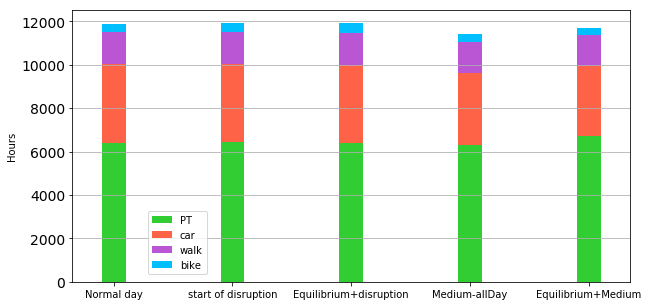

In [77]:
#Colors_list = ['#5cb85c','#5bc0de','#d9534f']
#colors = ['yellowgreen','lightcoral','plum','lightskyblue']
colors = ['limegreen','tomato','mediumorchid','deepskyblue']
#Colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
#ax = (travelDis_allagent_min_swap_reduced.div(travelDis_allagent_min_swap_reduced.sum(1), axis=0)).plot(kind='bar',
 #           stacked = True, figsize=(10,5),width = 0.2,edgecolor=None, colors= colors)
ax = travelDis_allagent_min_swap_reduced.plot(kind='bar',
            stacked = True, figsize=(10,5),width = 0.2,edgecolor=None, colors= colors)
ax.yaxis.grid(True)
ax.set_facecolor('xkcd:white')
plt.legend(labels=travelDis_allagent_min_swap_reduced.columns,fontsize= 12)
plt.legend(loc='lower right', bbox_to_anchor=(0.25, 0.01))
#plt.xticks(horizontalalignment="middle")
#plt.title("Percentage of mode choice analysis in scenarios for all agents",fontsize= 16)

#plt.xticks(fontsize=10,rotation=17)
plt.xticks(fontsize=10,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks(fontsize=14)



# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    #ax.annotate('{:0.2%}'.format(height), (x - 0.06, y +  0.03),fontsize=12,weight = 'bold')
    #ax.annotate('{:}'.format(height), (x - 0.06, y +  0.01),fontsize=12)

    
plt.ylabel('Hours')    
plt.savefig("Percentage of travel time per mode choice analysis in scenarios for all agents.png")     

# Mode Share Analysis

In [78]:
modeshare_allagent_WD= pd.DataFrame()
#scenarios = [df_benchmark,df_equilibrium,df_reactive,df_lineTen_ca,df_lineTen_Schedule,df_IncCap,df_IncCap_100_equi,
               # df_IncCap_20,df_IncCap_20_equi,df_line11_after4,df_current,df_zero]

#keys = ["EOD",'EWD','start of disruption','lineTen_ca','lineTen_Schedule','IncCap','IncCap_100_equi',
               # 'IncCap_20','IncCap_20_equi','line11','start of trip','no information']

for key, scenario in zip(keys,scenarios):
        modeshare_allagent_WD[key] = scenario["mode_"+key]
modeshare_allagent_WD.head()

,EOD,no information,start of disruption,EWD,line11,IncCap_20,IncCap_20_equi,IncCap,IncCap_100_equi
0,transit_walk,transit_walk,transit_walk,transit_walk,walk,walk,transit_walk,walk,bike
1,transit_walk,transit_walk,transit_walk,transit_walk,walk,walk,transit_walk,walk,bike
2,pt,pt,pt,pt,pt,pt,pt,pt,pt
3,transit_walk,transit_walk,transit_walk,transit_walk,transit_walk,transit_walk,transit_walk,transit_walk,transit_walk
4,walk,walk,walk,walk,walk,walk,walk,walk,walk


In [79]:
df_modeshare_allagent_WD=pd.DataFrame()
for column in modeshare_allagent_WD:
    df_modeshare_allagent_WD[column] = modeshare_allagent_WD[column].value_counts()
    
df_modeshare_allagent_WD

,EOD,no information,start of disruption,EWD,line11,IncCap_20,IncCap_20_equi,IncCap,IncCap_100_equi
car,15442,15433,15438,15482,14332,14334,14176,14334,14039
walk,12932,12919,12908,12977,13670,13668,12821,13668,12847
pt,12078,12070,12078,11944,13461,13461,13355,13461,13438
transit_walk,4990,4988,5014,5036,4522,4522,5281,4522,5311
bike,1489,1488,1489,1492,946,946,1298,946,1296


In [80]:
df_modeshare_allagent_WD.rename(columns={"mode_EOD":"mode"
    ,"EOD":"Normal day",
                                         "start of disruption":"start of disruption",
                                         "no information":"No information",
                                             "EWD":"Equilibrium+disruption",
                                #"lineTen_ca":"2x10",
                                             "line11":"Line11-Large",
                                 "IncCap":"Large-allDay",
                                         "IncCap_100_equi":"Equilibrium+Large",
                                 "IncCap_20":"Medium-allDay",
                                         "IncCap_20_equi":"Equilibrium+Medium"}, inplace = True)

In [81]:
#df_modeshare_allagent_WD.rename({"leg":"pt"}, inplace=True)
df_modeshare_allagent_WD_swap= df_modeshare_allagent_WD.T
df_modeshare_allagent_WD_swap

,car,walk,pt,transit_walk,bike
Normal day,15442,12932,12078,4990,1489
No information,15433,12919,12070,4988,1488
start of disruption,15438,12908,12078,5014,1489
Equilibrium+disruption,15482,12977,11944,5036,1492
Line11-Large,14332,13670,13461,4522,946
Medium-allDay,14334,13668,13461,4522,946
Equilibrium+Medium,14176,12821,13355,5281,1298
Large-allDay,14334,13668,13461,4522,946
Equilibrium+Large,14039,12847,13438,5311,1296


In [82]:
df_modeshare_allagent_WD_swap= df_modeshare_allagent_WD_swap[["pt","car","bike","walk"]]
df_modeshare_allagent_WD_swap

,pt,car,bike,walk
Normal day,12078,15442,1489,12932
No information,12070,15433,1488,12919
start of disruption,12078,15438,1489,12908
Equilibrium+disruption,11944,15482,1492,12977
Line11-Large,13461,14332,946,13670
Medium-allDay,13461,14334,946,13668
Equilibrium+Medium,13355,14176,1298,12821
Large-allDay,13461,14334,946,13668
Equilibrium+Large,13438,14039,1296,12847


In [83]:
df_modeshare_allagent_WD_swap.to_excel("ModeShare_raw data_tripbased_all Agents.xlsx")

# get Percentage

In [84]:
df_modeshare_allagent_WD_swap= df_modeshare_allagent_WD_swap[["pt","car","walk","bike"]]

In [85]:
df_percentage_allagents = df_modeshare_allagent_WD_swap.div(df_modeshare_allagent_WD_swap.sum(axis=1), axis=0).mul(100).round(2)
df_percentage_allagents

,pt,car,walk,bike
Normal day,28.80,36.82,30.83,3.55
No information,28.80,36.82,30.83,3.55
start of disruption,28.82,36.83,30.80,3.55
Equilibrium+disruption,28.51,36.95,30.98,3.56
Line11-Large,31.74,33.79,32.23,2.23
Medium-allDay,31.74,33.80,32.23,2.23
Equilibrium+Medium,32.06,34.04,30.78,3.12
Large-allDay,31.74,33.80,32.23,2.23
Equilibrium+Large,32.29,33.73,30.87,3.11


In [86]:
#df_percentage_allagents.drop('start of trip', inplace = True)

In [87]:
df_percentage_allagents.to_excel("ModeShare_percentage_tripbased_all Agents.xlsx")

In [88]:
df_percentage_allagents_reduced=df_percentage_allagents.loc[["Normal day","start of disruption",
                                                         "Equilibrium+disruption","Medium-allDay","Equilibrium+Medium"]]
df_percentage_allagents_reduced

,pt,car,walk,bike
Normal day,28.80,36.82,30.83,3.55
start of disruption,28.82,36.83,30.80,3.55
Equilibrium+disruption,28.51,36.95,30.98,3.56
Medium-allDay,31.74,33.80,32.23,2.23
Equilibrium+Medium,32.06,34.04,30.78,3.12


TypeError: 'AxesSubplot' object is not subscriptable

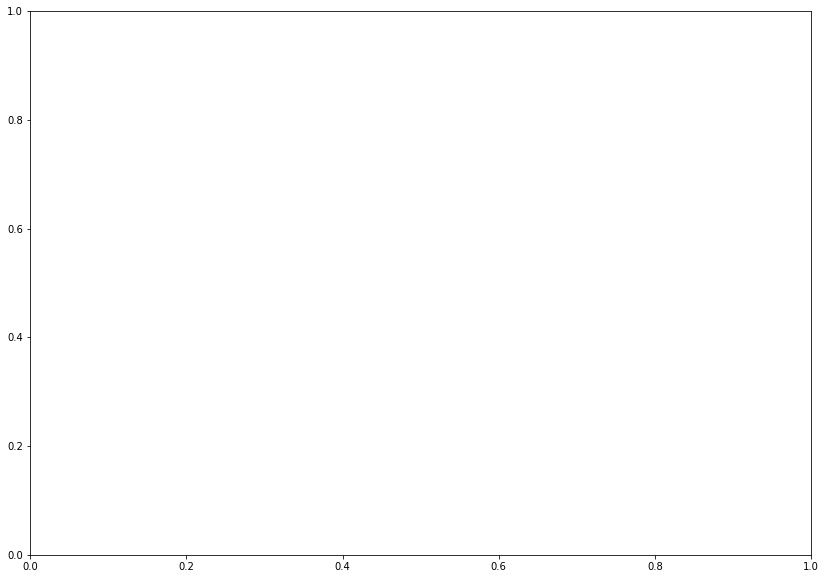

In [89]:
#fig, axes = plt.subplots(3, 3, figsize=(14, 10))
fig, axes = plt.subplots(1,1,figsize=(14, 10))
colors = ['yellowgreen','lightcoral','pink','lightskyblue']
#labels = 'pt', 'transit_walk', 'car', 'bike', 'walk'

for i, (idx, row) in enumerate(df_percentage_allagents_reduced.iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .001)]
    #ax.pie(row, autopct='%1.1f%%',startangle=30, color=colors)
    #ax.pie(row,  colors=colors,autopct='%0.01f%%', startangle=30, pctdistance=0.7, radius=1)
    ax.pie(row,  colors=colors, autopct='%0.01f%%',radius=1-size*i, wedgeprops=dict(width=size))
    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(np.arange(3)*4)
    inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

    ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
    
    ax.set_title(idx)

    
#fig.legend(('pt','transit_walk','car', 'walk', 'bike'), prop={'size': 8}, title = 'Scenarios')
fig.legend(labels=df_percentage_allagents_reduced.columns,fontsize= 14,loc="center right")
fig.subplots_adjust(hspace=0.1, wspace=0.01)
fig.savefig("Pie chart for mode analysis per trip.pdf")

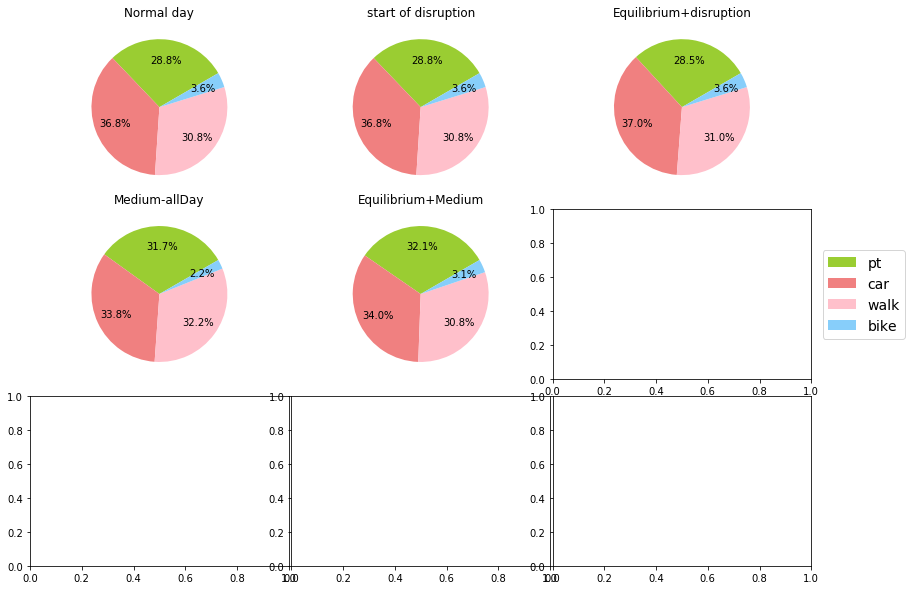

In [90]:
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
#fig, axes = plt.subplots(1,1,figsize=(14, 10))
colors = ['yellowgreen','lightcoral','pink','lightskyblue']
#labels = 'pt', 'transit_walk', 'car', 'bike', 'walk'

for i, (idx, row) in enumerate(df_percentage_allagents_reduced.iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .001)]
    #ax.pie(row, autopct='%1.1f%%',startangle=30, color=colors)
    ax.pie(row,  colors=colors,autopct='%0.01f%%', startangle=30, pctdistance=0.7, radius=1)
    #ax.pie(row,  colors=colors, autopct='%0.01f%%',radius=1-size*i, wedgeprops=dict(width=size))
    ax.set_title(idx)

    
#fig.legend(('pt','transit_walk','car', 'walk', 'bike'), prop={'size': 8}, title = 'Scenarios')
fig.legend(labels=df_percentage_allagents_reduced.columns,fontsize= 14,loc="center right")
fig.subplots_adjust(hspace=0.1, wspace=0.01)
fig.savefig("Pie chart for mode analysis per trip.pdf")

In [91]:
df_percentage_allagents_reduced=df_percentage_allagents.loc[["Normal day","start of disruption",
                                                         "Equilibrium+disruption","Medium-allDay","Equilibrium+Medium"]]
df_percentage_allagents_reduced.rename(columns={"pt":"PT"}, inplace=True)

In [92]:
df_percentage_allagents_reduced.rename(columns={"pt":"PT"}, inplace=True)

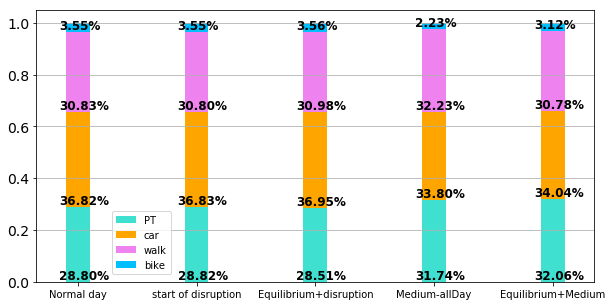

In [93]:
#Colors_list = ['#5cb85c','#5bc0de','#d9534f']
#colors = ['yellowgreen','lightcoral','plum','lightskyblue']
colors = ['turquoise','orange','violet','deepskyblue']
#Colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = (df_percentage_allagents_reduced.div(df_percentage_allagents_reduced.sum(1), axis=0)).plot(kind='bar',
            stacked = True, figsize=(10,5),width = 0.2,edgecolor=None, colors= colors)
ax.yaxis.grid(True)
ax.set_facecolor('xkcd:white')
plt.legend(labels=df_percentage_allagents_reduced.columns,fontsize= 12)
plt.legend(loc='lower right', bbox_to_anchor=(0.25, 0.01))
#plt.xticks(horizontalalignment="middle")
#plt.title("Percentage of mode choice analysis in scenarios for all agents",fontsize= 16)

#plt.xticks(fontsize=10,rotation=17)
plt.xticks(fontsize=10,rotation=0)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks(fontsize=14)



# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:0.2%}'.format(height), (x - 0.06, y +  0.01),fontsize=12,weight = 'bold')
    
plt.savefig("Percentage of travel time per mode choice analysis in scenarios for all agents.pdf")    

In [94]:
df_percentage_allagents

,pt,car,walk,bike
Normal day,28.80,36.82,30.83,3.55
No information,28.80,36.82,30.83,3.55
start of disruption,28.82,36.83,30.80,3.55
Equilibrium+disruption,28.51,36.95,30.98,3.56
Line11-Large,31.74,33.79,32.23,2.23
Medium-allDay,31.74,33.80,32.23,2.23
Equilibrium+Medium,32.06,34.04,30.78,3.12
Large-allDay,31.74,33.80,32.23,2.23
Equilibrium+Large,32.29,33.73,30.87,3.11


# Draw the Waterfalls

In [95]:
df_percentage_allagents_fig=df_percentage_allagents.loc[["Equilibrium without the disruption","start of disruption","Medium-allDay","Equilibrium+Medium"]]
df_percentage_allagents_fig

c:\apps\python353\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,pt,car,walk,bike
Equilibrium without the disruption,NaN,NaN,NaN,NaN
start of disruption,28.82,36.83,30.80,3.55
Medium-allDay,31.74,33.80,32.23,2.23
Equilibrium+Medium,32.06,34.04,30.78,3.12


KeyError: 'Equilibrium without the disruption'

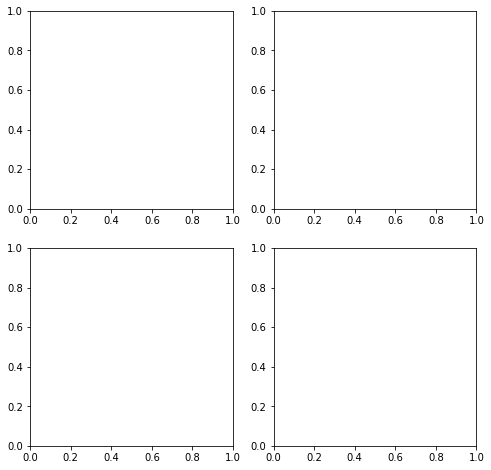

In [96]:

colors = ['yellowgreen','lightskyblue','purple','pink']
fig, axes = plt.subplots(2,2, figsize=(8,8))

for idx, ax in zip(df_percentage_allagents_fig.index, axes.ravel()):
    s1, s2 = df_percentage_allagents.loc[idx].cumsum(),travelDis_allagent_min_swap.loc[idx].cumsum()
    ax.bar(s1.shift(fill_value=0),travelDis_allagent_min_swap.loc[idx],width=df_percentage_allagents.loc[idx],
            bottom=s2.shift(fill_value=0), align='edge', color=colors)
    ax.set_title(idx)
    
    

fig.tight_layout()